<a href="https://colab.research.google.com/github/SarahHasan5/ShAI-Assignment/blob/main/salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.shape

(607, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
df.isnull()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
602,False,False,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False,False,False
605,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()
#We conclude that there are no missing values.

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

In [ ]:
df.duplicated().sum()
#We conclude that there are no duplicate rows

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
#We have deleted the unnamed column because it is unnecessary.

<ipython-input-66-e3c6f45e6cf3>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=high_sal, y='salary_in_usd', x='job_title', marker='o', sort=False, palette='Reds')


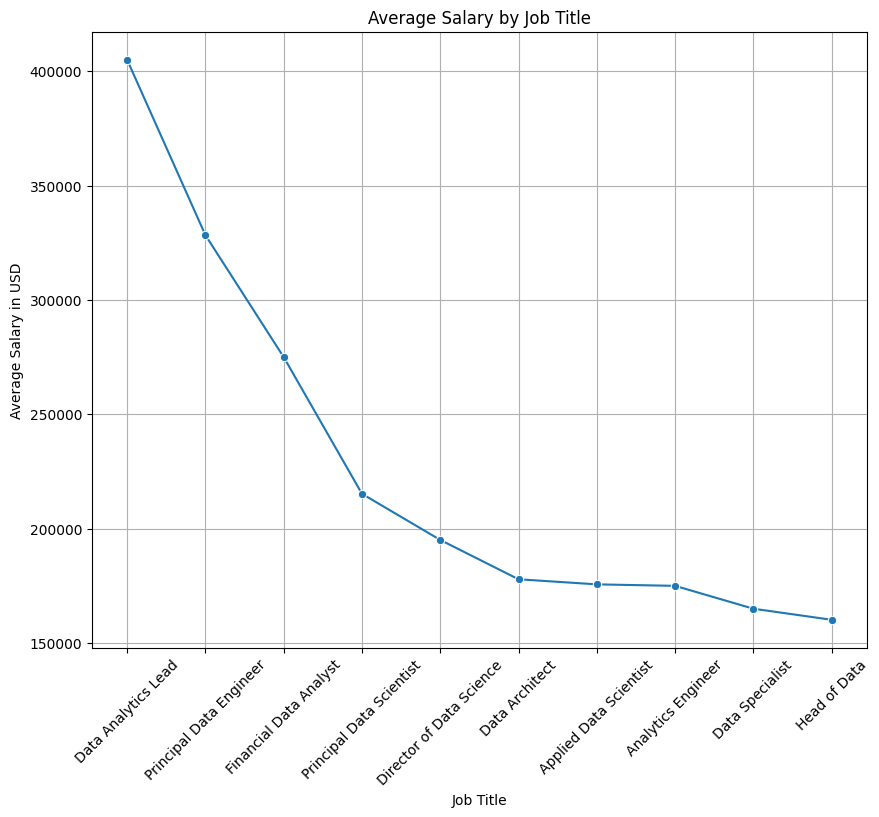

We conclude from the graph that the average salary of the job (Data Analytics Lead) is higher than others.


In [ ]:
high_sal = df.groupby('job_title', as_index=False)['salary_in_usd'].mean()
high_sal = high_sal.sort_values(by='salary_in_usd', ascending=False).head(10)
plt.figure(figsize=(10, 8))
sns.lineplot(data=high_sal, y='salary_in_usd', x='job_title', marker='o', sort=False, palette='Reds')
plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary in USD")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print('We conclude from the graph that the average salary of the job (Data Analytics Lead) is higher than others.')

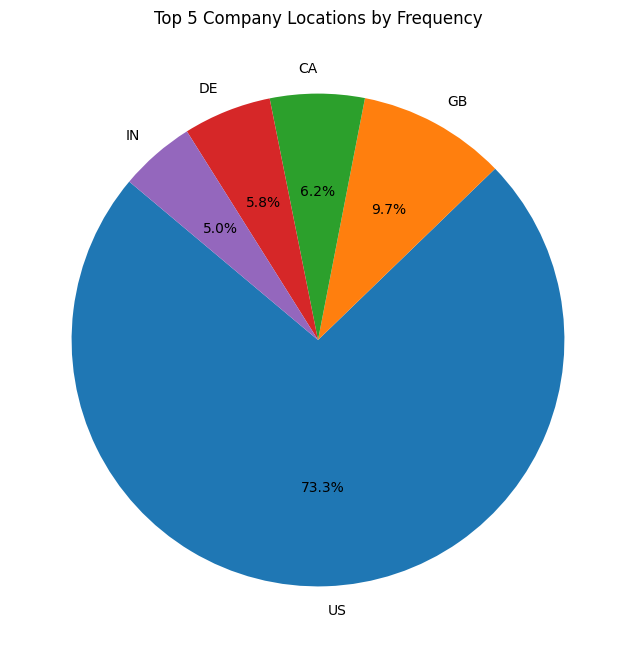

USD is the highest one


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
company_locations = df['company_location'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(company_locations, labels=company_locations.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Company Locations by Frequency')
plt.show()
print('USD is the highest one')

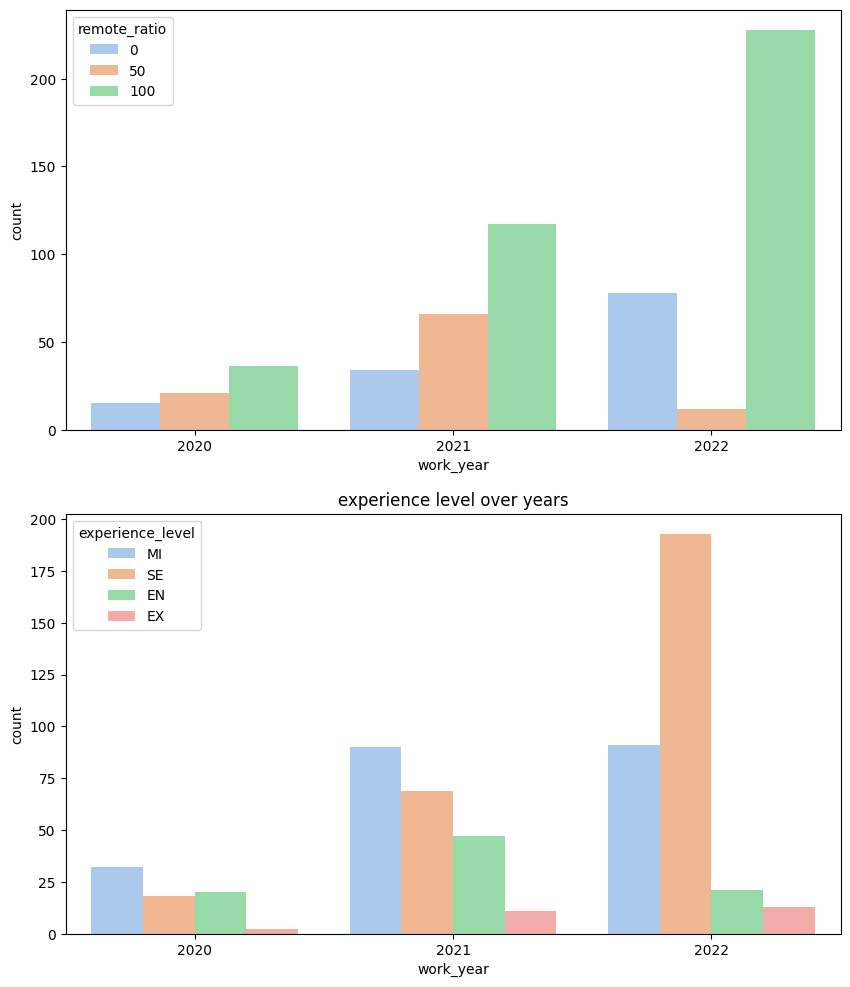

We observe that the year 2022 has the highest remote work ratio at 100%, and the year 2021 has a higher remote work ratio at 50%.
We note that in 2022, the SE job is the most frequent. Also, we observe that the MI job has an equal count in both 2022 and 2021.


In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
sns.countplot(data=df, x='work_year',hue ='remote_ratio',palette ='pastel',ax=axes[0])
plt.title('remote ratio over years')
sns.countplot(data=df, x='work_year',hue ='experience_level',palette ='pastel',ax=axes[1])
plt.title('experience level over years')
plt.show()
print('We observe that the year 2022 has the highest remote work ratio at 100%, and the year 2021 has a higher remote work ratio at 50%.')
print('We note that in 2022, the SE job is the most frequent. Also, we observe that the MI job has an equal count in both 2022 and 2021.')

<ipython-input-70-b4aead758224>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=employment_counts, x='employment_type', y='count', palette='colorblind')


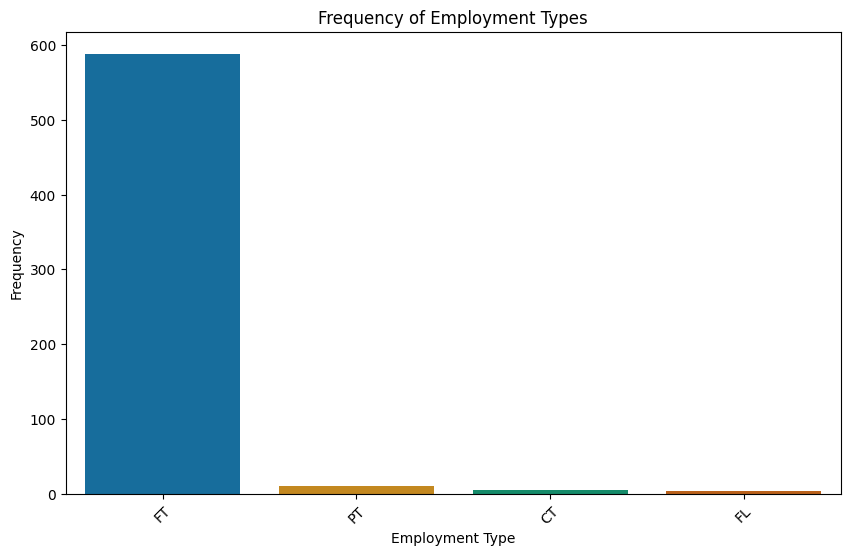

We conclude that the full-time job is the most demanded compared to others.


In [ ]:
employment_counts = df['employment_type'].value_counts().reset_index()
employment_counts.columns = ['employment_type', 'count']
plt.figure(figsize=(10, 6))
sns.barplot(data=employment_counts, x='employment_type', y='count', palette='colorblind')
plt.title('Frequency of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
print('We conclude that the full-time job is the most demanded compared to others.')

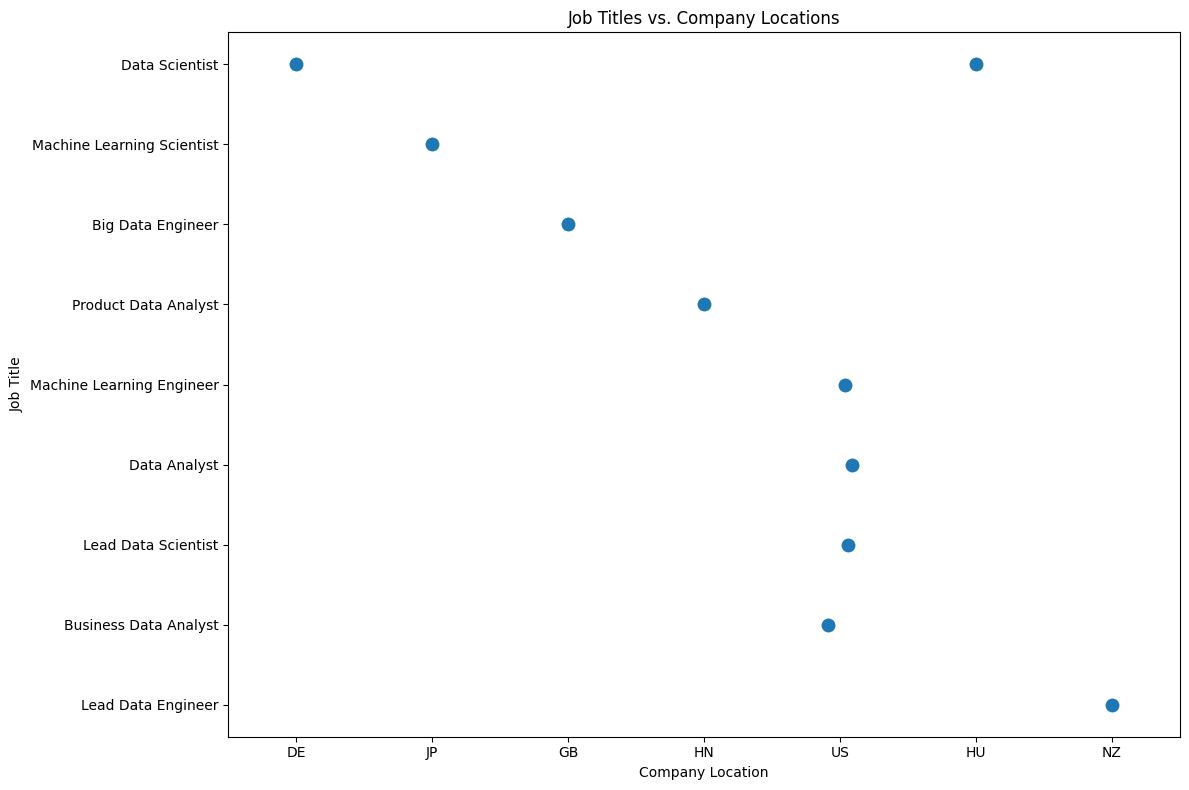

We also observe that jobs are more distributed in the US than in others.


In [ ]:
top_10_rows = df.head(10)
plt.figure(figsize=(12, 8))
sns.stripplot(data=top_10_rows, x='company_location', y='job_title', size=10, jitter=True)
plt.title('Job Titles vs. Company Locations')
plt.xlabel('Company Location')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()
print('We also observe that jobs are more distributed in the US than in others.')

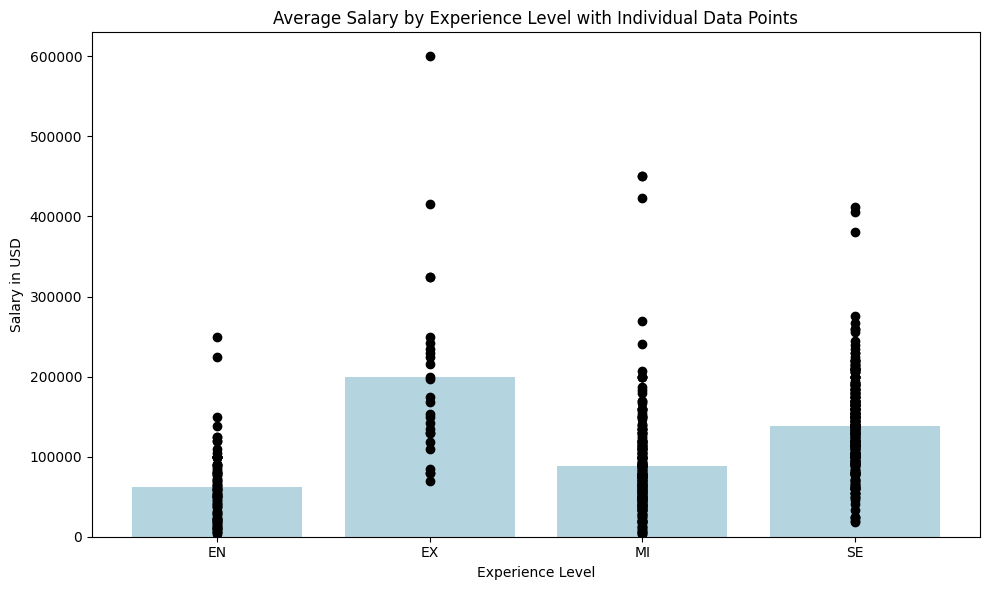

We observe that EX is the most


In [ ]:
avg_salaries_by_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_salaries_by_exp, x='experience_level', y='salary_in_usd', color='lightblue')
for level in df['experience_level'].unique():
    subset = df[df['experience_level'] == level]
    plt.scatter([level] * subset.shape[0], subset['salary_in_usd'], color='black')
plt.title('Average Salary by Experience Level with Individual Data Points')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()
print('We observe that EX is the most')

In [ ]:
#Report:
# First we examined the data and cleaned it appropriately, including the removal of unnamed columns.
#Then we conducted an exploratory analysis of the data, from which we drew several conclusions.
# These findings are detailed under each resulting chart.